In [1]:
import numpy as np
import talib
print(np.__version__)
print(talib.__version__)


1.25.2
0.4.25


In [2]:
import numpy as np
import talib
import pandas as pd

# Load your dataset
df = pd.read_parquet('data/processed/feature_engineered_dataset.parquet')

# Function to add technical indicators
def add_technical_indicators(df):
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)
    df['EMA_50'] = talib.EMA(df['Close'], timeperiod=50)
    df['BB_Upper'], df['BB_Middle'], df['BB_Lower'] = talib.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    return df

# Add technical indicators to the dataset
df = add_technical_indicators(df)

# Save the updated dataset
df.to_parquet('data/processed/dataset_with_technical_indicators.parquet')

# Verify the added columns
print(df.head())


         Date Ticker       Open       High        Low      Close     Volume  \
0  2014-07-01   AAPL  23.379999  23.517500  23.282499  23.379999  152892000   
1  2014-07-02   AAPL  23.467501  23.514999  23.272499  23.370001  113860000   
2  2014-07-03   AAPL  23.417500  23.525000  23.299999  23.507500   91567200   
3  2014-07-07   AAPL  23.535000  23.997499  23.525000  23.992500  225872000   
4  2014-07-08   AAPL  24.067499  24.200001  23.480000  23.837500  260888000   

   Sentiment     DJI_Close  VIX_Close  ...  Volatility  RSI  MACD  \
0        0.0  16956.070312      11.15  ...         0.0  NaN   NaN   
1        0.0  16976.240234      10.82  ...         0.0  NaN   NaN   
2        0.0  17068.259766      10.32  ...         0.0  NaN   NaN   
3        0.0  17024.210938      11.33  ...         0.0  NaN   NaN   
4        0.0  16906.619141      11.98  ...         0.0  NaN   NaN   

   MACD_Signal  MACD_Hist  EMA_20  EMA_50  BB_Upper  BB_Middle  BB_Lower  
0          NaN        NaN     NaN  

In [3]:
# Drop rows with any NaN values
df.dropna(inplace=True)

# Save the cleaned dataset
df.to_parquet('data/processed/dataset_with_technical_indicators_cleaned.parquet')

# Verify the cleaned dataset
print(df.head())


          Date Ticker       Open       High        Low      Close     Volume  \
49  2014-09-10   AAPL  24.502501  25.277500  24.440001  25.250000  403478400   
50  2014-09-11   AAPL  25.102501  25.360001  24.905001  25.357500  249412400   
51  2014-09-12   AAPL  25.302500  25.547501  25.270000  25.415001  250504400   
52  2014-09-15   AAPL  25.702499  25.762501  25.360001  25.407499  245266000   
53  2014-09-16   AAPL  24.950001  25.315001  24.722500  25.215000  267632400   

    Sentiment     DJI_Close  VIX_Close  ...  Volatility        RSI      MACD  \
49        0.0  17068.710938      12.88  ...    0.013845  57.810353  0.170310   
50        0.0  17049.000000      12.80  ...    0.013628  59.170776  0.190638   
51        0.0  16987.509766      13.31  ...    0.013628  59.915330  0.208979   
52        0.0  17031.140625      14.12  ...    0.013622  59.762216  0.220369   
53        0.0  17131.970703      12.73  ...    0.013561  55.820106  0.211426   

    MACD_Signal  MACD_Hist     EMA_20 

In [5]:
# Forward fill NaN values
df.ffill(inplace=True)

# Save the cleaned dataset
df.to_parquet('data/processed/dataset_with_technical_indicators_filled.parquet')

# Verify the filled dataset
print(df.head())


          Date Ticker       Open       High        Low      Close     Volume  \
49  2014-09-10   AAPL  24.502501  25.277500  24.440001  25.250000  403478400   
50  2014-09-11   AAPL  25.102501  25.360001  24.905001  25.357500  249412400   
51  2014-09-12   AAPL  25.302500  25.547501  25.270000  25.415001  250504400   
52  2014-09-15   AAPL  25.702499  25.762501  25.360001  25.407499  245266000   
53  2014-09-16   AAPL  24.950001  25.315001  24.722500  25.215000  267632400   

    Sentiment     DJI_Close  VIX_Close  ...  Volatility        RSI      MACD  \
49        0.0  17068.710938      12.88  ...    0.013845  57.810353  0.170310   
50        0.0  17049.000000      12.80  ...    0.013628  59.170776  0.190638   
51        0.0  16987.509766      13.31  ...    0.013628  59.915330  0.208979   
52        0.0  17031.140625      14.12  ...    0.013622  59.762216  0.220369   
53        0.0  17131.970703      12.73  ...    0.013561  55.820106  0.211426   

    MACD_Signal  MACD_Hist     EMA_20 

In [6]:
# Backward fill NaN values
df.bfill(inplace=True)

# Save the cleaned dataset
df.to_parquet('data/processed/dataset_with_technical_indicators_filled.parquet')

# Verify the filled dataset
print(df.head())


          Date Ticker       Open       High        Low      Close     Volume  \
49  2014-09-10   AAPL  24.502501  25.277500  24.440001  25.250000  403478400   
50  2014-09-11   AAPL  25.102501  25.360001  24.905001  25.357500  249412400   
51  2014-09-12   AAPL  25.302500  25.547501  25.270000  25.415001  250504400   
52  2014-09-15   AAPL  25.702499  25.762501  25.360001  25.407499  245266000   
53  2014-09-16   AAPL  24.950001  25.315001  24.722500  25.215000  267632400   

    Sentiment     DJI_Close  VIX_Close  ...  Volatility        RSI      MACD  \
49        0.0  17068.710938      12.88  ...    0.013845  57.810353  0.170310   
50        0.0  17049.000000      12.80  ...    0.013628  59.170776  0.190638   
51        0.0  16987.509766      13.31  ...    0.013628  59.915330  0.208979   
52        0.0  17031.140625      14.12  ...    0.013622  59.762216  0.220369   
53        0.0  17131.970703      12.73  ...    0.013561  55.820106  0.211426   

    MACD_Signal  MACD_Hist     EMA_20 

Mean Squared Error: 0.00028115492823411006
R^2 Score: 0.43067886869805894


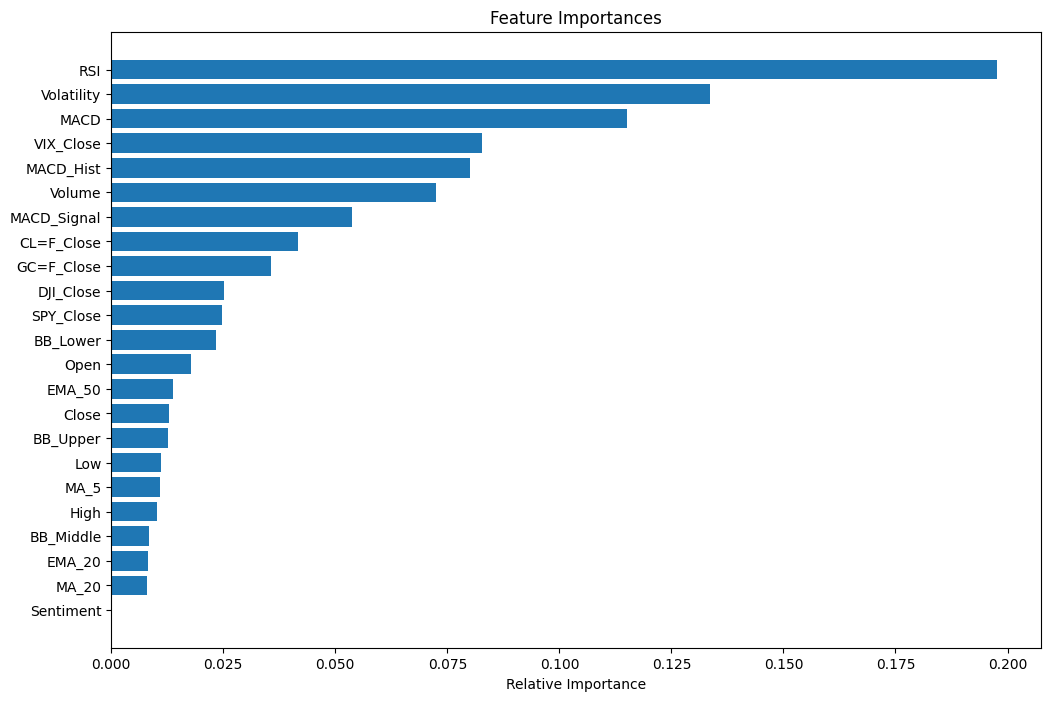

In [7]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
df = pd.read_parquet('data/processed/dataset_with_technical_indicators_filled.parquet')

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Drop unnecessary columns for model training
X = df.drop(columns=['Date', 'Ticker', 'Return'])
y = df['Return']

# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (example using RandomForestRegressor)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Save the model
import joblib
joblib.dump(model, 'data/processed/random_forest_model_with_indicators.pkl')

# Feature importance plot
import matplotlib.pyplot as plt

importance = model.feature_importances_
features = X.columns
indices = np.argsort(importance)

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best R² Score: {grid_search.best_score_}')

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\rahul\Desktop\Project_Algo\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
222 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rahul\Desktop\Project_Algo\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rahul\Desktop\Project_Algo\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\rahul\Desktop\Project_Algo\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_c

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best R² Score: 0.33291874212086603
Mean Squared Error: 0.00031743222377074616
R² Score: 0.3572196159465121


In [10]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB 8.9 MB/s eta 0:00:14
   ---------------------------------------- 0.8/124.9 MB 8.5 MB/s eta 0:00:15
   ---------------------------------------- 1.4/124.9 MB 9.8 MB/s eta 0:00:13
    --------------------------------------- 1.9/124.9 MB 10.3 MB/s eta 0:00:12
    --------------------------------------- 2.6/124.9 MB 11.9 MB/s eta 0:00:11
   - -------------------------------------- 3.3/124.9 MB 12.5 MB/s eta 0:00:10
   - -------------------------------------- 3.9/124.9 MB 12.3 MB/s eta 0:00:10
   - -------------------------------------- 4.5/124.9 MB 12.5 MB/s eta 0:00:10
   - -------------------------------------- 4.8/124.9 MB 12.2 MB/s eta 0:00:10
   - -------------------------------------- 5.0/124.9 MB 11.0 MB/s eta 0:00:11
   - -------------------------------------- 5.3/124.9 MB 10.6 MB/s eta 0:00:12
   - -------------------------------------- 5.8/124.9 MB 10.6 M

In [1]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Construct the path to your training data
train_data_path = os.path.join(os.getcwd(), 'data', 'processed', 'your_train_data_file.parquet')

# Print the constructed path
print("Path to Training Data:", train_data_path)


Current Working Directory: C:\Users\rahul\Desktop\Project_Algo
Path to Training Data: C:\Users\rahul\Desktop\Project_Algo\data\processed\your_train_data_file.parquet
